In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import numpy as np

from matplotlib import pyplot as plt

from tabulate import tabulate

(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

m, n = 28, 28
P  = [10,50,200]
T = 2
n_train, n_test = 60000, 10000

train_images = train_images.reshape((n_train, m, n))
test_images = test_images.reshape((n_test, m, n))

# Normalize pixel values to be between 0 and 1
train_images, target_images = train_images / 255.0, train_images / 255.0
test_images,test_target_images = test_images / 255.0, test_images / 255.0

In [2]:
def train_models(P):
    model = models.Sequential()

    model.add(layers.Flatten(input_shape=(m, n)))
    model.add(layers.Dense(P))
    model.add(layers.Dense(m * n * T, activation='relu'))
    model.add(layers.Dense(m * n))
    model.add(layers.Reshape((m, n)))

    model.summary()

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

    model.fit(train_images, target_images, epochs=10, batch_size=64)
    
    test_loss, test_acc = model.evaluate(test_images, test_target_images)
    
    decompressed_image = model.predict(test_images)
    
    return decompressed_image

In [3]:
decompressed_image_1 = train_models(P[0])
decompressed_image_2 = train_models(P[1])
decompressed_image_3 = train_models(P[2])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 1568)              17248     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               1230096   
_________________________________________________________________
reshape (Reshape)            (None, 28, 28)            0         
Total params: 1,255,194
Trainable params: 1,255,194
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 255us/sample - loss: 0.0224

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_4 (Dense)              (None, 1568)              79968     
_________________________________________________________________
dense_5 (Dense)              (None, 784)               1230096   
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28)            0         
Total params: 1,349,314
Trainable params: 1,349,314
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 17s 291us/sample - loss: 0.01

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_7 (Dense)              (None, 1568)              315168    
_________________________________________________________________
dense_8 (Dense)              (None, 784)               1230096   
_________________________________________________________________
reshape_2 (Reshape)          (None, 28, 28)            0         
Total params: 1,702,264
Trainable params: 1,702,264
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 22s 368us/sample - loss: 0.01

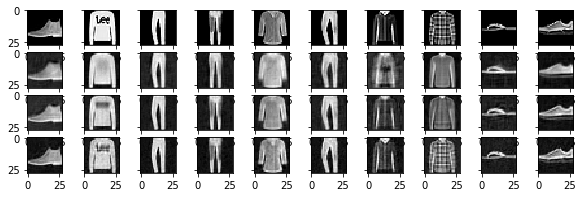

In [4]:
n_images = 10

f, axarr = plt.subplots(4, n_images,figsize=(10, 3), sharey=True)


for i in range(n_images):
    axarr[0, i].imshow(test_target_images[i], cmap='gray')
    axarr[1, i].imshow(decompressed_image_1[i], cmap='gray')
    axarr[2, i].imshow(decompressed_image_2[i], cmap='gray')
    axarr[3, i].imshow(decompressed_image_3[i], cmap='gray')
    
plt.show()

In [5]:
PSNR_1,PSNR_2,PSNR_3 = 0,0,0

for i in range(n_test):
    MSE = tf.keras.losses.MeanSquaredError()
    test_mse_1 = MSE(test_target_images[i], decompressed_image_1[i])
    test_mse_2 = MSE(test_target_images[i], decompressed_image_2[i])
    test_mse_3 = MSE(test_target_images[i], decompressed_image_3[i])
    PSNR_1 += 10 * np.log10(1 / test_mse_1)
    PSNR_2 += 10 * np.log10(1 / test_mse_2)
    PSNR_3 += 10 * np.log10(1 / test_mse_3)
    
PSNR_1 = PSNR_1 / n_test
PSNR_2 = PSNR_2 / n_test
PSNR_3 = PSNR_3 / n_test
print(tabulate([['10', PSNR_1], ['50', PSNR_2], ['200', PSNR_3]], headers=['P-Value', 'PSNR']))

  P-Value     PSNR
---------  -------
       10  19.4453
       50  22.3909
      200  25.5242
